# Perturbation and sensitivity analysis of Boolean networks

In this tutorial, we study how Boolean networks respond to perturbations.
Rather than implementing perturbations manually, we leverage BoolForge’s
built-in robustness and sensitivity measures.

You will learn how to:
- quantify robustness and fragility of Boolean networks under synchronous update,
- interpret basin-level and attractor-level robustness measures,
- perform exact and approximate robustness computations, and
- compute Derrida values as a measure of dynamical sensitivity.

Together, these tools allow us to assess dynamical stability and resilience of 
Boolean network models in a principled and computationally efficient way.

## Setup

In [1]:
import boolforge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We reuse the small Boolean network from the previous tutorial as a running example.

In [2]:
string = """
x = y
y = x OR z
z = y
"""

bn = boolforge.BooleanNetwork.from_string(string, separator="=")

print("Variables:", bn.variables)
print("Number of nodes:", bn.N)

Variables: ['x' 'y' 'z']
Number of nodes: 3


## Exact attractors and robustness measures

BoolForge provides a single method that computes:
- all attractors,
- basin sizes,
- overall network coherence and fragility,
- basin-level coherence and fragility, and
- attractor-level coherence and fragility.

These quantities are defined via systematic single-bit perturbations
in the Boolean hypercube and can be computed *exactly* for small networks.

In [3]:
results_exact = bn.get_attractors_and_robustness_synchronous_exact()
results_exact.keys()

dict_keys(['Attractors', 'NumberOfAttractors', 'BasinSizes', 'AttractorID', 'Coherence', 'Fragility', 'BasinCoherence', 'BasinFragility', 'AttractorCoherence', 'AttractorFragility'])

In [4]:
print("Number of attractors:", results_exact["NumberOfAttractors"])
print("Attractors (decimal states):", results_exact["Attractors"])
print("Eventual attractor of each state:", results_exact["AttractorID"])

print("Basin sizes:", results_exact["BasinSizes"])
print("Overall coherence:", results_exact["Coherence"])
print("Overall fragility:", results_exact["Fragility"])

Number of attractors: 3
Attractors (decimal states): [[0], [2, 5], [7]]
Eventual attractor of each state: [0 1 1 2 1 1 2 2]
Basin sizes: [0.125 0.5   0.375]
Overall coherence: 0.3333333333333333
Overall fragility: 0.3333333333333333


## Basin-level and attractor-level robustness

Robustness can be resolved at different structural levels.
We now inspect basin-specific and attractor-specific measures.

In [5]:
df_basins = pd.DataFrame({
    "BasinSize": results_exact["BasinSizes"],
    "BasinCoherence": results_exact["BasinCoherence"],
    "BasinFragility": results_exact["BasinFragility"],
})

df_attractors = pd.DataFrame({
    "AttractorCoherence": results_exact["AttractorCoherence"],
    "AttractorFragility": results_exact["AttractorFragility"],
})

print("Basin-level robustness:")
print(df_basins)

print("Attractor-level robustness:")
print(df_attractors)

Basin-level robustness:
   BasinSize  BasinCoherence  BasinFragility
0      0.125        0.000000        0.500000
1      0.500        0.333333        0.333333
2      0.375        0.444444        0.277778
Attractor-level robustness:
   AttractorCoherence  AttractorFragility
0            0.000000            0.500000
1            0.333333            0.333333
2            0.666667            0.166667


Interpretation:

- **Coherence** measures the fraction of single-bit perturbations that do *not*
  change the final attractor.
- **Fragility** measures how much the attractor state changes *when* a perturbation
  does lead to a different attractor.

Importantly, attractors are often less stable than their basins,
a phenomenon explored in detail in Tutorial #10.

## Visualization of basin robustness

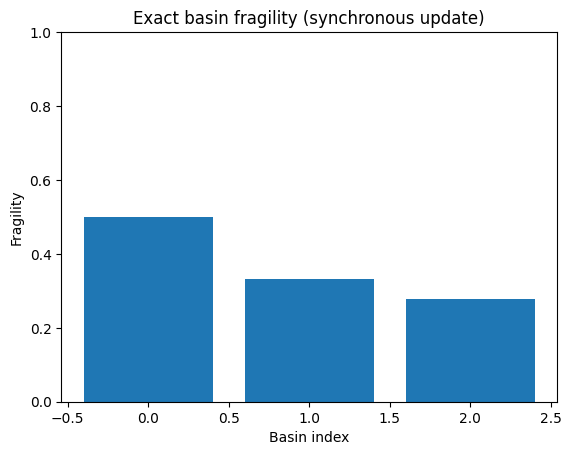

In [6]:
fig, ax = plt.subplots()

ax.bar(
    np.arange(len(results_exact["BasinSizes"])),
    results_exact["BasinFragility"],
    label="Basin fragility",
)
ax.set_xlabel("Basin index")
ax.set_ylabel("Fragility")
ax.set_title("Exact basin fragility (synchronous update)")
ax.set_ylim(0, 1)

plt.show()

## Approximate robustness for larger networks

For larger networks, exact enumeration of all 2^N states is infeasible.
BoolForge therefore provides a Monte Carlo approximation that samples
random initial conditions and perturbations.

In [7]:
results_approx = bn.get_attractors_and_robustness_synchronous(
    n_simulations=500
)

results_approx.keys()

dict_keys(['Attractors', 'LowerBoundOfNumberOfAttractors', 'BasinSizesApproximation', 'CoherenceApproximation', 'FragilityApproximation', 'FinalHammingDistanceApproximation', 'BasinCoherenceApproximation', 'BasinFragilityApproximation', 'AttractorCoherence', 'AttractorFragility'])

In [8]:
print("Lower bound on number of attractors:", results_approx["LowerBoundOfNumberOfAttractors"])
print("Approximate coherence:", results_approx["CoherenceApproximation"])
print("Approximate fragility:", results_approx["FragilityApproximation"])
print("Final Hamming distance approximation:",
      results_approx["FinalHammingDistanceApproximation"])

Lower bound on number of attractors: 3
Approximate coherence: 0.334
Approximate fragility: 0.333
Final Hamming distance approximation: 0.333


Even for this small network, the approximate values closely match the exact ones.
For larger networks, these approximations are often the only feasible option.

## Derrida value: dynamical sensitivity

The Derrida value measures how perturbations *propagate* after one synchronous update.
It is defined as the expected Hamming distance between updated states that initially
differed in exactly one bit.

In [9]:
derrida_exact = bn.get_derrida_value(exact=True)
derrida_approx = bn.get_derrida_value(n_simulations=2000)

print("Exact Derrida value:", derrida_exact)
print("Approximate Derrida value:", derrida_approx)

Exact Derrida value: 1.0
Approximate Derrida value: 0.988


Interpretation:

- Small Derrida values indicate ordered, stable dynamics.
- Large Derrida values indicate sensitive or chaotic dynamics.

Derrida values are closely related to average sensitivity of the update functions,
and provide a complementary notion of robustness to basin-based measures.

## Summary and outlook

In this tutorial you learned how to:
- compute exact robustness measures for small Boolean networks,
- interpret coherence and fragility at network, basin, and attractor levels,
- approximate robustness measures for larger networks, and
- assess dynamical sensitivity using the Derrida value.

**Next steps:**
In Tutorial 9, we will move from global robustness measures to
*trajectory-based* sensitivity analysis, including damage spreading,
Hamming distance dynamics, and time-resolved perturbation experiments.